## 1. importar librerias

In [ ]:
import pandas as pd
import numpy as np

## 2. Importar los datos

In [ ]:
df= pd.read_csv('/content/Numeros.txt')
df

,x,y
0,1,2
1,2,3
2,2,4
3,3,4
4,4,4
5,4,6
6,5,5
7,6,7


In [ ]:
df['xy']=df['x']*df['y']
df

,x,y,xy
0,1,2,2
1,2,3,6
2,2,4,8
3,3,4,12
4,4,4,16
5,4,6,24
6,5,5,25
7,6,7,42


In [ ]:
df['x^2']=df['x']**2
df

,x,y,xy,x^2
0,1,2,2,1
1,2,3,6,4
2,2,4,8,4
3,3,4,12,9
4,4,4,16,16
5,4,6,24,16
6,5,5,25,25
7,6,7,42,36


In [ ]:
totals = df.sum()

# Convertir la serie de totales en un DataFrame con una etiqueta de índice
totals_df = pd.DataFrame(totals).T
totals_df.index = ['Total']

# Añadir la fila de totales al DataFrame usando pd.concat
df_totals = pd.concat([df, totals_df])
df_totals

,x,y,xy,x^2
0,1,2,2,1
1,2,3,6,4
2,2,4,8,4
3,3,4,12,9
4,4,4,16,16
5,4,6,24,16
6,5,5,25,25
7,6,7,42,36
Total,27,35,135,111


In [ ]:
def calc_slope():
  global size,tot_x,tot_y
  size=len(df_totals)-1
  tot_xy=df_totals['xy'].iloc[-1]
  tot_x=df_totals['x'].iloc[-1]
  tot_y=df_totals['y'].iloc[-1]
  tot_xx=df_totals['x^2'].iloc[-1]
  m=((size*tot_xy)-(tot_x*tot_y))/((size*tot_xx)-(tot_x**2))
  return m
m=calc_slope()
m

0.8490566037735849

In [ ]:
def calc_intercep():
  return (tot_y/size)-m*(tot_x/size)
b=calc_intercep()
b

1.5094339622641506

In [ ]:
def pred(x):
  return m*x+b
pred(6)

6.60377358490566

In [ ]:
def calc_ssr():
  df_totals['y_pred'] = df['x'].apply(pred)
  df_totals['residuals'] = df_totals['y'] - df_totals['y_pred']

  # Calcular la suma de cuadrados de los residuos (SSR)
  ssr = (df_totals['residuals'] ** 2).sum()
  return ssr
calc_ssr()

3.5471698113207544

In [ ]:
df_totals

,x,y,xy,x^2,y_pred,residuals
0,1,2,2,1,2.358491,-0.358491
1,2,3,6,4,3.207547,-0.207547
2,2,4,8,4,3.207547,0.792453
3,3,4,12,9,4.056604,-0.056604
4,4,4,16,16,4.905660,-0.905660
5,4,6,24,16,4.905660,1.094340
6,5,5,25,25,5.754717,-0.754717
7,6,7,42,36,6.603774,0.396226
Total,27,35,135,111,NaN,NaN


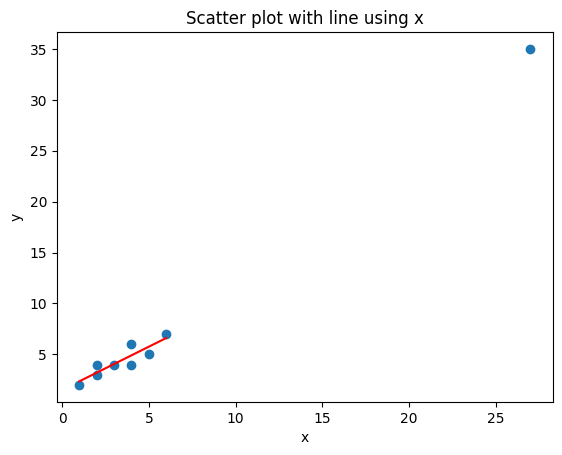

In [ ]:
# prompt: scatter plot with line using x

import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(df_totals['x'], df_totals['y'])

# Plot the line
plt.plot(df_totals['x'], df_totals['y_pred'], color='red')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot with line using x')

# Show the plot
plt.show()


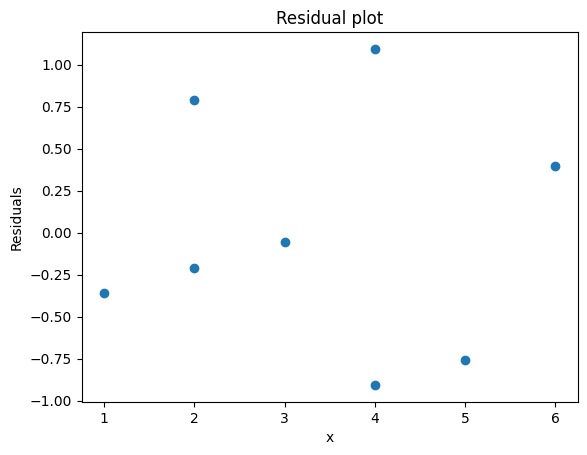

In [ ]:
# prompt: grafica los residuales

# Plot the residuals
plt.scatter(df_totals['x'], df_totals['residuals'])

# Add labels and title
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual plot')

# Show the plot
plt.show()
